<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing

### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Do some EDA on a natural language processing dataset
- Identify why natural language processing is difficult.
- Demonstrate text classification on a multi-class problem.
- Demonstrate common text preprocessing techniques.

### How Do We Use NLP in Data Science?

In data science, we are often asked to analyze unstructured text or make a predictive model using it. Unfortunately, most data science techniques require numeric data. NLP libraries provide a tool set of methods to convert unstructured text into meaningful numeric data.

- **Analysis:** NLP techniques provide tools to allow us to understand and analyze large amounts of text. For example:

    - Analyze the positivity/negativity of comments on different websites. 
    - Extract key words from meeting notes and visualize how meeting topics change over time.

- **Vectorizing for machine learning:** When building a machine learning model, we typically must transform our data into numeric features. This process of transforming non-numeric data such as natural language into numeric features is called vectorization. For example:

    - Understanding related words. Using stemming, NLP lets us know that "swim", "swims", and "swimming" all refer to the same base word. This allows us to reduce the number of features used in our model.
    - Identifying important and unique words. Using TF-IDF (term frequency-inverse document frequency), we can identify which words are most likely to be meaningful in a document.

### Libraries we will use & things to download

In [ ]:
!pip install wordcloud

In [ ]:
!conda install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

In [ ]:
!conda install -c conda-forge spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [210]:
!python -m spacy download en_core_web_lg

  Stored in directory: D:\Users\gregb\AppData\Local\Temp\1\pip-ephem-wheel-cache-l2raxowz\wheels\9f\3c\d6\3ade7ed8195030f4d7f299cf73d856a84d7b3effd5890133fb
Successfully built en-core-web-lg
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## Lesson Guide

- [Introduction to Natural Language Processing](#intro)
- [Reading Yelp reviews With NLP](#yelp_rev)
- [Text Classification](#text_class)
- [Count Vectorization](#count_vec)
    - [Using CountVectorizer in a Model](#countvectorizer-model)
    - [N-Grams](#ngrams)
    - [Stop-Word Removal](#stopwords)
	- [Count Vector Options](#cvec_opt)
- [Intro to Spacy](#textblob)
	- [Parts of speech]
    - [Stemming and Lemmatization](#stem)
- [Term Frequency–Inverse Document Frequency Vectorization](#tfidf)
	- [Yelp Summary Using TF–IDF](#yelp_tfidf)
- [Sentiment Analysis](#sentiment)
- [BONUS: Adding Features to a Document-Term Matrix](#add_feat)
- [Conclusion](#conclusion)

## Introduction

### What Is Natural Language Processing (NLP)?

- Using computers to process (analyze, understand, generate) natural human languages.
- Making sense of human knowledge stored as unstructured text.
- Building probabilistic models using data about a language.

### What Are Some of the Higher-Level Task Areas?

- **Objective:** Discuss the major tasks involved with natural language processing.

We often hope that computers can solve many high-level problems involving natural language. Unfortunately, due to the difficulty of understanding human language, many of these problems are still not well solved. That said, existing solutions to these problems all involve utilizing the lower-level components of NLP discussed in the next section. Some higher-level tasks include:

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Objective:** Discuss, on a low level, the components of natural language processing.

Unfortunately, the NLP programming libraries typically do not provide direct solutions for the high-level tasks above. Instead, they provide low-level building blocks that enable us to craft our own solutions. These include:

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

- **Objective:** Identify why natural language processing is difficult.

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

<a id='yelp_rev'></a>

## Reading in the Yelp Reviews

Throughout this lesson, we will use Yelp reviews to practice and discover common low-level NLP techniques.

You should be familiar with these terms, as they are frequently used in NLP:
- **corpus**: a collection of documents (derived from the Latin word for "body")
- **corpora**: plural form of corpus

In [1]:
import pandas as pd

In [2]:
yelp = pd.read_csv('data/yelp.csv', index_col='review_id', parse_dates=['date'])

In [3]:
yelp.sample(5)

,business_id,date,stars,text,type,user_id,cool,useful,funny
review_id,,,,,,,,,
YPNq_oUyl5MKRjGShanEEA,JJDaF4yFPLgQ3u678qyL2w,2012-09-11,5,There are 3 choices at ASU for game design. Wh...,review,Q4Yy0RkFVtyqsYig8dyg3w,0,0,0
breTkAJpsdmO2YXCantl6A,eGj1NnvbIUVWgDYQWEOwQg,2012-06-03,4,One of my favorite parks that I've been to! Th...,review,7o7MF9B9lxcWupE8jiLOaQ,0,0,0
YHvP_RM3pvYXbGRH-k0a3Q,DcrM4hwDcU2G6vuh2cnaYQ,2010-04-25,4,Excellent service. Easy to access. Dessert i...,review,zMhkzu9VXFULKQ8YCCsDVQ,0,0,0
f5Nkgg5Drd6fJyoZA5mkIA,lBRCMN7wNn-BKUsaOXJRow,2011-02-16,5,We love this place. We got Miss V washed up wi...,review,NSu-sX5ZAcnWN5Sy0QDohg,0,0,0
agWENQvyoHf3w-k5uu_3RA,Cse5FvYuACIxljwaac2SZg,2012-07-10,4,Another new great place in the Arcadia neighbo...,review,pEVf8GRshP9HUkSpizc9LA,1,3,0


In [4]:
yelp['text_count'] = yelp.text.map(len)
yelp.text_count.plot.hist()

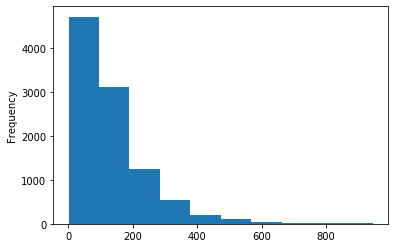

In [5]:
yelp['word_count'] = yelp.text.str.split(' ').map(len)
yelp['word_count'].plot.hist()

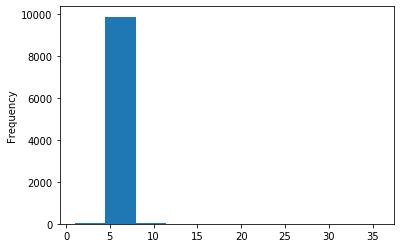

In [6]:
yelp['average_word_length'] = yelp.text_count / yelp.word_count
yelp.average_word_length.plot.hist()

In [7]:
yelp[yelp.average_word_length > 15]

,business_id,date,stars,text,type,user_id,cool,useful,funny,text_count,word_count,average_word_length
review_id,,,,,,,,,,,,
Qv1jJdZftPlfJef45OX3GQ,gUt-pPUpOVVhaCFC8-E4yQ,2011-03-27,5,Bomb ............................................,review,_tTNzjkD-pvWqSb-Ahw9Uw,0,0,0,143,4,35.75


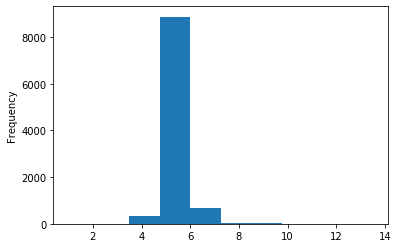

In [8]:
yelp[yelp.average_word_length < 15].average_word_length.plot.hist()

In [9]:
yelp['words'] = yelp.text.str.split(' ')
yelp['distinct_word_count'] = yelp.words.map(lambda x: len(set(x)))
yelp['lexical_diversity'] = yelp.distinct_word_count / yelp.word_count

In [10]:
yelp.groupby('user_id').lexical_diversity.mean().sort_values(ascending=False)

user_id
I7zvmDRYtsLUHsLi50wDNA    1.000000
Eq6j-P0ipCIlhI1GqrbpWQ    1.000000
H4XCAov3KP3JjThhExpocg    1.000000
HE8AOm5mO_sgap7_coM0RQ    1.000000
HEag_QERXNbyGmNgA6no2Q    1.000000
HOAFwraJMBTcYy1qTmFmgQ    1.000000
HavRojH3G8AlJchZXonaOg    1.000000
nURs-n-ucizNeoo280nmTQ    1.000000
Hqgx3IdJAAaoQjvrUnbNvw    1.000000
x1Yagv0rOlPd_NRu5t0SIA    1.000000
I6KftQl6q4I7IuKV7wPR7w    1.000000
IAOCwB3c2c_-6_Y5rAjXIg    1.000000
x4thcv_eJg2FBsb_E8P4sA    1.000000
n5PtmHO-PSHiyseG56XZtA    1.000000
IXuKjVb0F7t7T-BTpwLqKQ    1.000000
I_i3bHwfSFne6eTHPe4tMQ    1.000000
x7QYSYyc_x63-61Z9SB8jA    1.000000
Iqqy89mlRXExxeP8RZqCUA    1.000000
mm1-8hxSTbQH9iUAIkML4w    1.000000
IwZkZmCpc2D7DslEogiBYg    1.000000
IwiupaUMeltnd0a9Cp15tA    1.000000
mavwphmn_T_u_J4Pcmocbg    1.000000
JCpQDETmyGtQ_PJbSnc47w    1.000000
2fdyqZooz7YSZ5vgkDLxxA    1.000000
JDVbRaxrjJaLX75UQ8Q3Ng    1.000000
Gzh93lma7vWTK2WiENHd4w    1.000000
nzhUfCzDUW8VFLc40nAtsA    1.000000
GwTb7Kiacz0jxqtiK8y09g    1.000000
GV40APiM60CX

In [11]:
yelp[yelp.user_id == 'VkuUr9DO7eefmsFQ_fEJTA']

,business_id,date,stars,text,type,user_id,cool,useful,funny,text_count,word_count,average_word_length,words,distinct_word_count,lexical_diversity
review_id,,,,,,,,,,,,,,,
3vLZq2teUIqXnpnWWRNnNA,LzpR_jE6VIutJ08s2cdRrw,2010-05-01,3,My boyfriend and I had heard about the great f...,review,VkuUr9DO7eefmsFQ_fEJTA,0,0,0,4119,812,5.07266,"[My, boyfriend, and, I, had, heard, about, the...",358,0.440887


In [12]:
# Visualise with word clouds? Any other diagrams you want to make?

In [13]:
import wordcloud

In [14]:
w = wordcloud.WordCloud()

In [15]:
w.generate("\n".join(yelp.text))

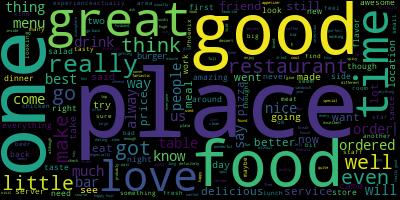

In [16]:
w.to_image()

<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

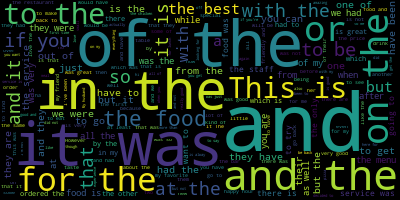

In [17]:
w = wordcloud.WordCloud(stopwords=['place'])
w.generate("\n".join(yelp.text))
w.to_image()

In [18]:
import nltk

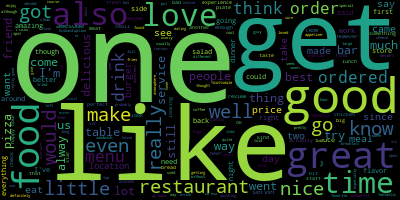

In [19]:
w = wordcloud.WordCloud(stopwords=['place'] + nltk.corpus.stopwords.words('english'))
w.generate("\n".join(yelp.text))
w.to_image() 

In [20]:
# What do you want to predict?

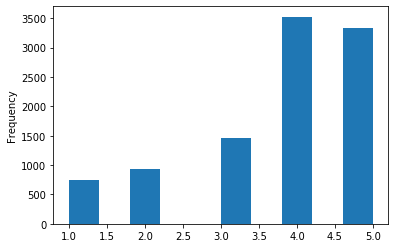

In [21]:
yelp.stars.plot.hist()

In [22]:
def stars2feedback(number_of_stars):
    if number_of_stars == 3:
        return 'neutral'
    if number_of_stars > 3:
        return 'happy'
    if number_of_stars < 3: 
        return 'sad'

yelp['feedback'] = yelp.stars.map(stars2feedback)

In [23]:
yelp.feedback.value_counts()

happy      6863
sad        1676
neutral    1461
Name: feedback, dtype: int64

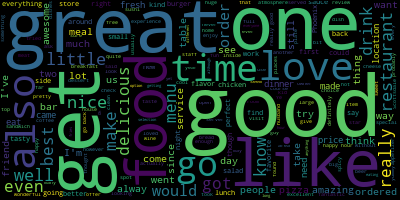

In [24]:
w = wordcloud.WordCloud(stopwords=['place'] + nltk.corpus.stopwords.words('english'))
w.generate("\n".join(yelp.text[yelp.feedback == 'happy']))
w.to_image() 

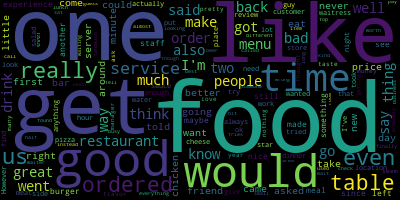

In [25]:
w = wordcloud.WordCloud(stopwords=['place'] + nltk.corpus.stopwords.words('english'))
w.generate("\n".join(yelp.text[yelp.feedback == 'sad']))
w.to_image() 

In [26]:
# add whatever features you want to add, do a train-test split, etc.

In [27]:
import sklearn.model_selection
Xtrain, Xtest, Ytrain, Ytest =  sklearn.model_selection.train_test_split(yelp.text, yelp.feedback,
                                                                        random_state=3334)

<a id='text_class'></a>


# Introduction: Text Classification

As you proceed through this section, note that text classification is done in the same way as all other 
classification models. 

First, the **text is vectorized into a set of numeric features**.

- Bag of words?
- Bag of n-grams?
- Weighted words or ngrams?
- Dimensionality reduced skip-gram (e.g. Glove, BERT)


Then, a standard machine learning classifier is applied. NLP libraries often include vectorizers and ML models that work particularly well with text.

> We will refer to each piece of text we are trying to classify as a document.
> - For example, a document could refer to an email, book chapter, tweet, article, or text message.

**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**

Starting out, we will make each unique word (across all documents) a single feature. In any given corpora, we may have hundreds of thousands of unique words, so we may have hundreds of thousands of features!

- For a given document, the numeric value of each feature could be the number of times the word appears in the document.
    - So, most features will have a value of zero, resulting in a sparse matrix of features.

- This technique for vectorizing text is referred to as a bag-of-words model. 
    - It is called bag of words because the document's structure is lost — as if the words are all jumbled up in a bag.
    - The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.

> Alternatively, we could make each column an indicator column, which is 1 if the word is present in the document (no matter how many times) and 0 if not. This vectorization could be used to reduce the importance of repeated words. For example, a website search engine would be susceptible to spammers who load websites with repeated words. So, the search engine might use indicator columns as features rather than word counts.

**We need to consider several things to decide if bag-of-words is appropriate.**

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Model
![DTM](images/DTM.png)

In [28]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=3, 
                                                                   token_pattern='(?u)\\b[a-z]{3,}\\b')

In [29]:
sklearn.feature_extraction.text.CountVectorizer?

In [30]:
vecTrain = count_vectorizer.fit_transform(Xtrain)
vecTrain

<7500x10216 sparse matrix of type '<class 'numpy.int64'>'
	with 524775 stored elements in Compressed Sparse Row format>

In [31]:
count_vectorizer.get_feature_names()

['aaron',
 'abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'abode',
 'abound',
 'about',
 'above',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutly',
 'absurd',
 'abundance',
 'abysmal',
 'acai',
 'accent',
 'accented',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accessories',
 'accident',
 'accidentally',
 'accolades',
 'accommodate',
 'accommodated',
 'accommodating',
 'accommodation',
 'accommodations',
 'accomodate',
 'accomodated',
 'accomodating',
 'accompanied',
 'accompaniment',
 'accompaniments',
 'accompany',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishment',
 'according',
 'accordingly',
 'account',
 'accross',
 'accurate',
 'accused',
 'accustomed',
 'ace',
 'ache',
 'achieve',
 'achieved',
 'acidic',
 'acknowledge',
 'acknowledged',
 'acknowledging',
 'acoustic',
 'acoustics',
 'acquaintance',
 'acquired',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'activ

In [32]:
yelp[yelp.text.str.lower().str.contains('0buxoc0crqjpvkezo3bqog')].text.iloc[0]

'Had some time to kill before the Ultimate pleY Date Yelp event, and I\'d wanted to share my love of Nobuo\'s Dark chocolate mousse with green tea ice cream and sugared orange peels with my happy-go-lucky cousin, who has never been here before, so we stopped by at 5:17p to find that Nobuo wouldn\'t open till 5:30p, so we waited outside in the comfortable patio.\r\n\r\nAfter watching a couple of employees add lanterns to their outdoor umbrellaed tables, I noticed the "OPEN" sign on the front door, so we entered the resto, whereupon we were greeted warmly by a male host and shown to a two-top.  I didn\'t like the energy in that room, so I asked if we could sit elsewhere, and he said to choose wherever we wanted to sit.  We were the first customers, so we chose a four-top, knowing we wouldn\'t be taking up space for very long, anyway.  Glasses of water were delivered, and soon we met our female server (whose name on the receipt reflected "Butai").  When she laid down the menus, I told her

# Make a model!

Logistic regression often works well. Support Vector Machines are usually good too.

(Decision trees and random forests usually take too long)

In [33]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegressionCV(solver='lbfgs', multi_class="auto", max_iter=1000, cv=5)
lr.fit(vecTrain, Ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

### How do measure the success of this model?

In [34]:
vecTest = count_vectorizer.transform(Xtest)
predictions = lr.predict(vecTest)

In [35]:
import sklearn.metrics

In [36]:
sklearn.metrics.confusion_matrix(Ytest, predictions)

array([[1596,   63,   38],
       [ 234,   92,   54],
       [ 113,   35,  275]], dtype=int64)

In [37]:
pd.Series(predictions).value_counts()

happy      1943
sad         367
neutral     190
dtype: int64

In [38]:
Ytest.value_counts()

happy      1697
sad         423
neutral     380
Name: feedback, dtype: int64

([<matplotlib.axis.YTick at 0x1d680905ba8>,
 <a list of 3 Text yticklabel objects>)

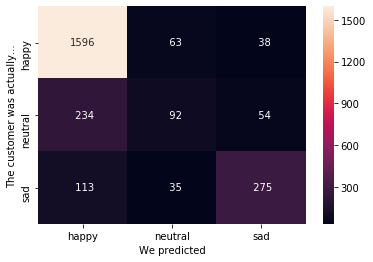

In [39]:
import seaborn as sns
sns.heatmap(sklearn.metrics.confusion_matrix(Ytest, predictions), annot=True, fmt='4d')
import matplotlib.pyplot as plt
plt.xlabel("We predicted")
plt.ylabel("The customer was actually...")
plt.xticks([0.5,1.5,2.5],["happy", "neutral", "sad"])
plt.yticks([0.5,1.5,2.5],["happy", "neutral", "sad"])

In [40]:
print(sklearn.metrics.classification_report(Ytest, predictions))

              precision    recall  f1-score   support

       happy       0.82      0.94      0.88      1697
     neutral       0.48      0.24      0.32       380
         sad       0.75      0.65      0.70       423

    accuracy                           0.79      2500
   macro avg       0.68      0.61      0.63      2500
weighted avg       0.76      0.79      0.76      2500



In [41]:
sklearn.metrics.accuracy_score(Ytest, predictions)

0.7852

In [42]:
sklearn.metrics.precision_score(Ytest, predictions, average='weighted')

0.7579579784063801

In [43]:
sklearn.metrics.recall_score(Ytest, predictions, average='weighted')

0.7852

In [44]:
sklearn.metrics.f1_score(Ytest, predictions, average='weighted')

0.7621195196364816

In [45]:
prediction_proba = lr.predict_proba(vecTest)
prediction_proba

array([[0.75696614, 0.21762062, 0.02541323],
       [0.94726608, 0.03950975, 0.01322417],
       [0.71989965, 0.20040839, 0.07969196],
       ...,
       [0.65669623, 0.25166117, 0.0916426 ],
       [0.03998995, 0.01371128, 0.94629877],
       [0.90494903, 0.08536901, 0.00968195]])

In [46]:
Xtest.head(3)

review_id
WeNhaODwNX1qmMXp5Y2bMg    I've got to admit, fishing at the Water Ranch ...
fdvuKm4JIKrcn5nWxqpX1A    Great all natural selection, if you are lookin...
v5mmm3T1XILyR0txwDVVJg    A nice place to go to catch the blockbuster mo...
Name: text, dtype: object

In [47]:
sklearn.metrics.auc(Ytest, prediction_proba)

ValueError: bad input shape (2500, 3)

### What do the coefficients of the model mean?

In [ ]:
lr

In [ ]:
lr.coef_.shape

In [ ]:
len(count_vectorizer.get_feature_names())

In [ ]:
happy_words = pd.Series(index=count_vectorizer.get_feature_names(), data=lr.coef_[0])
happy_words.sort_values(ascending=False)

In [ ]:
lr.predict(count_vectorizer.transform(["delicious and amazing"]))

In [ ]:
sad_words = pd.Series(index=count_vectorizer.get_feature_names(), data=lr.coef_[2])
sad_words.sort_values(ascending=False)

In [ ]:
neutral_words = pd.Series(index=count_vectorizer.get_feature_names(), data=lr.coef_[1])
neutral_words.sort_values(ascending=False)

In [ ]:
yelp[yelp.text.str.lower().str.contains('airport')].stars.plot.hist()

In [ ]:
happy_words[happy_words.abs() < 0.01]

In [ ]:
prediction_proba

Let's take a look next at other ways of preprocessing text!

- **Objective:** Demonstrate common text preprocessing techniques.

<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [ ]:
sad_words[sad_words.index == 'not']

In [ ]:
happy_words[happy_words.index == 'not']

In [ ]:
ngram_vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=2, 
                                                                   ngram_range=(2,3),
                                                                   token_pattern='(?u)\\b[a-z]{2,}\\b')
ngramTrainVecs = ngram_vectorizer.fit_transform(Xtrain)

In [ ]:
ngramTrainVecs.shape

In [ ]:
ngram_vectorizer.get_feature_names()

In [ ]:
ngram_lr = sklearn.linear_model.LogisticRegressionCV(multi_class='auto', solver='lbfgs', cv=5)
ngram_lr.fit(ngramTrainVecs, Ytrain)

In [ ]:
ngram_predictions = ngram_lr.predict(ngram_vectorizer.transform(Xtest))
sklearn.metrics.accuracy_score(Ytest, ngram_predictions)

In [ ]:
print(sklearn.metrics.classification_report(Ytest, predictions))

In [ ]:
import sklearn.svm
svc = sklearn.svm.SVC()
svc.fit(ngramTrainVecs, Ytrain)

In [ ]:
svc_predictions = svc.predict(ngram_vectorizer.transform(Xtest))
sklearn.metrics.accuracy_score(Ytest, svc_predictions)

<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a "word" appears in a document, the more complex TF-IDF Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. 
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [ ]:
happy_words[happy_words.index=='place']

In [ ]:
happy_words[happy_words.index=='food']

In [ ]:
yelp.text.str.lower().str.contains('food').mean()

In [ ]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(min_df=3, token_pattern='(?u)\\b[a-z]{3,}\\b')

In [ ]:
tfidf_train_vec = tfidf.fit_transform(Xtrain)

In [ ]:
tfidf_lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
tfidf_lr.fit(tfidf_train_vec, Ytrain)

In [ ]:
tfidf_happy_words = pd.Series(index=tfidf.get_feature_names(), data=tfidf_lr.coef_[0])
tfidf_happy_words.sort_values(ascending=False)

In [ ]:
happy_words.sort_values(ascending=False)

# An introduction to Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python, and one of the
best available.

It is a bit slow though. For something faster that is less comprehensive, Facebook have "fasttext"

In [48]:
import spacy

In [49]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# call nlp() on a string to turn it into a document

In [198]:
doc = nlp("""This is not a good restaurant. The curry smells like a leopard.
          Donald Trump won't eat here. Nor would Jawaharlal Nehru.
          At 12pm on a Monday I would rather go to Lahore in India.""")
doc

This is not a good restaurant. The curry smells like a leopard.
          Donald Trump won't eat here. Nor would Jawaharlal Nehru.
          At 12pm on a Monday I would rather go to Lahore in India.

In [199]:
for sentence in doc.sents:
    print(sentence)

This is not a good restaurant.
The curry smells like a leopard.
          
Donald Trump won't eat here.
Nor would Jawaharlal Nehru.
          
At 12pm on a Monday I would rather go to Lahore in India.


In [200]:
# look at each word in each sentence and see 
# - orth_
# - pos_
# - tag_
# - dep_
# - lemma_
# - head.lemma_

In [201]:
for sentence in doc.sents:
    for word in sentence:
        print(word.orth_, word.pos_, word.tag_, word.dep_, word.lemma_, word.head.orth_)

This DET DT nsubj this is
is AUX VBZ ROOT be is
not PART RB neg not is
a DET DT det a restaurant
good ADJ JJ amod good restaurant
restaurant NOUN NN attr restaurant is
. PUNCT . punct . is
The DET DT det the curry
curry NOUN NN nsubj curry smells
smells VERB VBZ ROOT smell smells
like SCONJ IN prep like smells
a DET DT det a leopard
leopard NOUN NN pobj leopard like
. PUNCT . punct . smells

           SPACE _SP  
           .
Donald PROPN NNP compound Donald Trump
Trump PROPN NNP nsubj Trump eat
wo AUX MD aux will eat
n't PART RB neg not eat
eat VERB VB ROOT eat eat
here ADV RB advmod here eat
. PUNCT . punct . eat
Nor CCONJ CC cc nor would
would AUX MD ROOT would would
Jawaharlal PROPN NNP compound Jawaharlal Nehru
Nehru PROPN NNP nsubj Nehru would
. PUNCT . punct . would

           SPACE _SP  
           .
At ADP IN prep at go
12 NUM CD nummod 12 pm
pm NOUN NN pobj p.m. At
on ADP IN prep on go
a DET DT det a Monday
Monday PROPN NNP pobj Monday on
I PRON PRP nsubj -PRON- go
would AU

In [202]:
list(doc.noun_chunks)

[a good restaurant,
 The curry,
 a leopard,
 Donald Trump,
 Jawaharlal Nehru,
 12pm,
 a Monday,
 I,
 Lahore,
 India]

In [203]:
doc.ents

(Donald Trump, Jawaharlal Nehru, 12pm, Monday, Lahore, India)

In [204]:
doc.ents[0].label_

'PERSON'

In [205]:
doc.ents[1].label_

'PERSON'

In [206]:
doc.ents[2].label_

'QUANTITY'

In [207]:
doc.ents[3].label_

'DATE'

In [208]:
doc.ents[4].label_

'GPE'

In [209]:
doc.ents[5].label_

'GPE'

In [120]:
for word in doc:
    if word.pos_ == 'ADJ':
        print(word)

good


In [123]:
d1 = nlp(yelp.text.iloc[0])
for word in d1:
    if word.pos_ == 'ADJ':
        print(word.orth_, word.left_edge)

excellent excellent
perfect perfect
absolute absolute
excellent excellent
semi semi
- semi
busy semi
better so
Bloody Bloody
phenomenal phenomenal
best simply
sure pretty
fresh fresh
amazing amazing
excellent excellent
white white
tasty tasty
delicious delicious
griddled griddled
amazing amazing
complete the
best best


In [124]:
yelp.text.iloc[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [ ]:
# Look for past tense verbs only?

In [147]:
def past_verbs(doc):
    answer = []
    for sentence in doc.sents:
        for word in sentence:
            if word.tag_ == 'VBD':
                #answer.append(word.lemma_)
                answer.append(word.orth_)
    return " ".join(answer)

In [148]:
past_verbs(d1)

'took was was made was arrived looked was was had was came was made was'

In [151]:
%%time
yelp_sample = yelp.sample(1000).copy()
yelp_sample['nlp'] = yelp_sample.text.map(nlp)

Wall time: 41.2 s


In [ ]:
# How does the model perform only on verbs? What sort of coefficients do you see?

In [154]:
yelp_sample['past_tense_verbs'] = yelp_sample.nlp.map(past_verbs)
yelp_sample[['text', 'past_tense_verbs']]

,text,past_tense_verbs
review_id,,
Pviwc4jGf2dia6zKYc9CAA,Best breakfast in west Chandler! I love their...,
_ElIIVS6FSE051k9qKD8vQ,came here last Saturday night with a friend. t...,came had was crispy
DfsdM_qT6kyzRa2MpfeuSA,"Great Frozen Yogurt. Helpful staff, clean envi...",
0xA6Q_vQhVI4hZh7Wvaw5Q,I came here for a Yelp event and had a great t...,came had divided liked was rocked
dc9QzMK5ngeWlser3yiQLQ,Best place in Arcadia to get a coffee or a tea...,read
DPhy3dRkmhiphPD57j7Vtg,I have been here at least 10 times and have ne...,
4xdfcdhZSShne6aIVp1cMA,Ugh. My tip-off should have been the Guy Who ...,Saw came was was was scanned found ordered tol...
KuwJr_6BUt4tsrA6M3zbjg,"While I am giving this restaurant four stars, ...",served decided needed
L2NIFHpkykMg21g-a7lOpA,"This place does it right, but hold on to your ...",


In [155]:
tfidf3 = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range=(1,1), min_df=2)
verbvec = tfidf3.fit_transform(yelp_sample.past_tense_verbs)

In [156]:
tfidf3.get_feature_names()

['acted',
 'added',
 'agreed',
 'answered',
 'appeared',
 'appreciated',
 'approached',
 'arrived',
 'asked',
 'assumed',
 'assured',
 'ate',
 'attempted',
 'attended',
 'bagged',
 'beat',
 'became',
 'began',
 'blew',
 'booked',
 'bothered',
 'bought',
 'broke',
 'brought',
 'called',
 'came',
 'caught',
 'caved',
 'changed',
 'charged',
 'chatted',
 'checked',
 'chopped',
 'chose',
 'claimed',
 'cleaned',
 'cleared',
 'comped',
 'complained',
 'consisted',
 'contained',
 'continued',
 'cooked',
 'cost',
 'created',
 'crispy',
 'cut',
 'decided',
 'deserved',
 'determined',
 'devoured',
 'did',
 'dipped',
 'disappeared',
 'disappointed',
 'discovered',
 'disliked',
 'drank',
 'dropped',
 'drove',
 'dug',
 'dumped',
 'encountered',
 'ended',
 'enjoyed',
 'entered',
 'entertained',
 'envisioned',
 'expected',
 'experienced',
 'explained',
 'fell',
 'felt',
 'figured',
 'filled',
 'finished',
 'flew',
 'followed',
 'forgot',
 'found',
 'frequent',
 'gave',
 'got',
 'graduated',
 'greeted

In [158]:
lr = sklearn.linear_model.LogisticRegressionCV(multi_class='auto', solver='lbfgs', cv=5, max_iter=1000)
lr.fit(verbvec, yelp_sample.feedback)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [159]:
happy_verbs = pd.Series(index=tfidf3.get_feature_names(), data=lr.coef_[0])
happy_verbs.sort_values(ascending=False)

enjoyed        0.000328
loved          0.000309
lived          0.000173
moved          0.000158
bought         0.000130
opened         0.000115
liked          0.000090
remembered     0.000088
recommended    0.000086
helped         0.000082
shared         0.000082
mashed         0.000079
popped         0.000076
grilled        0.000075
stumbled       0.000070
determined     0.000068
picked         0.000067
had            0.000062
fell           0.000061
included       0.000060
smoked         0.000059
discovered     0.000058
greeted        0.000058
booked         0.000058
parked         0.000056
entered        0.000055
raved          0.000051
let            0.000051
set            0.000048
frequent       0.000047
                 ...   
saw           -0.000139
cut           -0.000142
stood         -0.000149
threw         -0.000157
sat           -0.000158
decided       -0.000158
left          -0.000167
walked        -0.000168
realized      -0.000195
lacked        -0.000197
made          -0

In [ ]:
# What about adjectives only? What do you notice about these adjectives?

In [162]:
hinglish = nlp('That was the most jhakaas meal')
for word in hinglish:
    print(word, word.pos_, word.head.lemma_)

That DET be
was AUX be
the DET meal
most ADV meal
jhakaas PROPN meal
meal NOUN be


In [176]:
financial = nlp("""
How do I open a trust account? How do I update the beneficiary? How can i short a derivative?
Move it from wash account to control account.
Can you give me 52 week high of apple?""")
for word in financial:
    print(word, word.pos_, word.head.lemma_)
list(financial.noun_chunks)


 SPACE how
How ADV open
do AUX open
I PRON open
open VERB open
a DET account
trust NOUN account
account NOUN open
? PUNCT open
How ADV update
do AUX update
I PRON update
update VERB update
the DET beneficiary
beneficiary NOUN update
? PUNCT update
How ADV short
can AUX short
i PRON short
short VERB short
a DET derivative
derivative NOUN short
? PUNCT short

 SPACE ?
Move VERB move
it PRON move
from ADP move
wash PROPN account
account NOUN from
to PART control
control NOUN move
account NOUN control
. PUNCT move

 SPACE .
Can AUX give
you PRON give
give VERB give
me PRON give
52 NUM week
week NOUN high
high ADJ give
of ADP high
apple NOUN of
? PUNCT give


[I,
 a trust account,
 I,
 the beneficiary,
 i,
 a derivative,
 it,
 wash account,
 account,
 you,
 me,
 apple]

In [171]:
wn.synsets(financial[-2].orth_)[0].definition()

'the recipient of funds or other benefits'

In [178]:
wn.synsets('high')[0].definition()

'a lofty level or position or degree'

<a id='sentiment'></a>
## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate.

In [52]:
import nltk
from nltk.corpus import wordnet as wn

In [53]:
wn.synsets('restaurant')

[Synset('restaurant.n.01')]

In [56]:
r = wn.synsets('restaurant')[0]
r

Synset('restaurant.n.01')

In [57]:
r.definition()

'a building where people go to eat'

In [58]:
r.hypernyms()

[Synset('building.n.01')]

In [60]:
r.hypernyms()[0].definition()

'a structure that has a roof and walls and stands more or less permanently in one place'

In [59]:
r.hyponyms()

[Synset('bistro.n.01'),
 Synset('brasserie.n.01'),
 Synset('brewpub.n.01'),
 Synset('cafe.n.01'),
 Synset('cafeteria.n.01'),
 Synset('canteen.n.03'),
 Synset('canteen.n.05'),
 Synset('diner.n.03'),
 Synset('greasy_spoon.n.01'),
 Synset('grillroom.n.01'),
 Synset('hash_house.n.01'),
 Synset('lunchroom.n.01'),
 Synset('rotisserie.n.02'),
 Synset('steakhouse.n.01'),
 Synset('teashop.n.01')]

In [65]:
r.hyponyms()[4].lemmas()

[Lemma('cafeteria.n.01.cafeteria')]

In [67]:
r.hyponyms()[4].name()

'cafeteria.n.01'

In [68]:
r.hyponyms()[4].name().split('.')[0]

'cafeteria'

In [79]:
r.hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0]

Synset('entity.n.01')

In [94]:
dog = wn.synsets('dog')
dog[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0]

Synset('object.n.01')

In [95]:
r.common_hypernyms(dog[0])

[Synset('physical_entity.n.01'),
 Synset('entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02')]

In [99]:
r.common_hypernyms(wn.synsets('happiness')[0])

[Synset('entity.n.01')]

In [104]:
cafe = wn.synsets('cafe')[0]
bistro = wn.synsets('bistro')[0]
cafe.common_hypernyms(bistro)

[Synset('building.n.01'),
 Synset('restaurant.n.01'),
 Synset('physical_entity.n.01'),
 Synset('whole.n.02'),
 Synset('structure.n.01'),
 Synset('entity.n.01'),
 Synset('object.n.01'),
 Synset('artifact.n.01')]

In [54]:
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
nltk.download('sentiwordnet')

In [ ]:
nltk.download('wordnet')

In [105]:
from nltk.corpus import sentiwordnet as swn

In [106]:
list(swn.senti_synsets('dog'))

[SentiSynset('dog.n.01'),
 SentiSynset('frump.n.01'),
 SentiSynset('dog.n.03'),
 SentiSynset('cad.n.01'),
 SentiSynset('frank.n.02'),
 SentiSynset('pawl.n.01'),
 SentiSynset('andiron.n.01'),
 SentiSynset('chase.v.01')]

In [107]:
list(swn.senti_synsets('great'))

[SentiSynset('great.n.01'),
 SentiSynset('great.s.01'),
 SentiSynset('great.s.02'),
 SentiSynset('great.s.03'),
 SentiSynset('bang-up.s.01'),
 SentiSynset('capital.s.03'),
 SentiSynset('big.s.13')]

In [108]:
great_adj = list(swn.senti_synsets('great'))[1]
great_adj.pos_score()

0.0

In [109]:
list(swn.senti_synsets('awesome'))[0].pos_score()

0.875

In [110]:
list(swn.senti_synsets('awesome'))[0].neg_score()

0.125

In [ ]:
list(swn.senti_synsets('terrible'))[0].neg_score()

In [ ]:
list(swn.senti_synsets('terrible'))[0].pos_score()

In [ ]:
# swn.senti_synsets(...)

In [ ]:
# list(swn.senti_synsets(...))[0].pos_score()

In [111]:
yelp.text.iloc[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [ ]:
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

While we used SKLearn and TextBlob today, another popular python NLP library is [Spacy](https://spacy.io).